In [21]:
import tensorflow as tf

fancy_mnist = tf.keras.datasets.fashion_mnist

(x_train, y_train), (x_test, y_test) = fancy_mnist.load_data()
# Antes que nada normalizamos las imágenes
x_train, x_test = x_train/float(255), x_test/float(255)

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

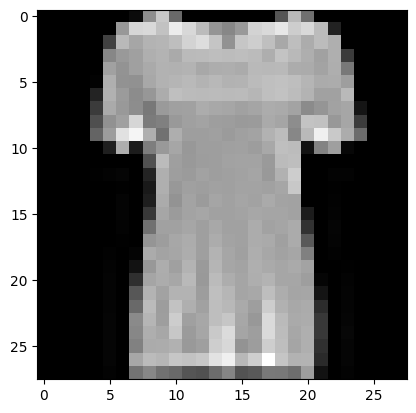

0
T-shirt/top


In [27]:
import matplotlib.pyplot as plt

i = 10
fig, ax = plt.subplots(1)
ax.remove
ax.imshow(x_train[i], cmap='gray')
plt.show()
print(y_train[i])
print(class_names[y_train[i]])

In [20]:
import numpy as np

In [24]:
# Exploramos los datos:
print(x_train.shape)
print(y_test.shape)

(60000, 28, 28)
(10000,)


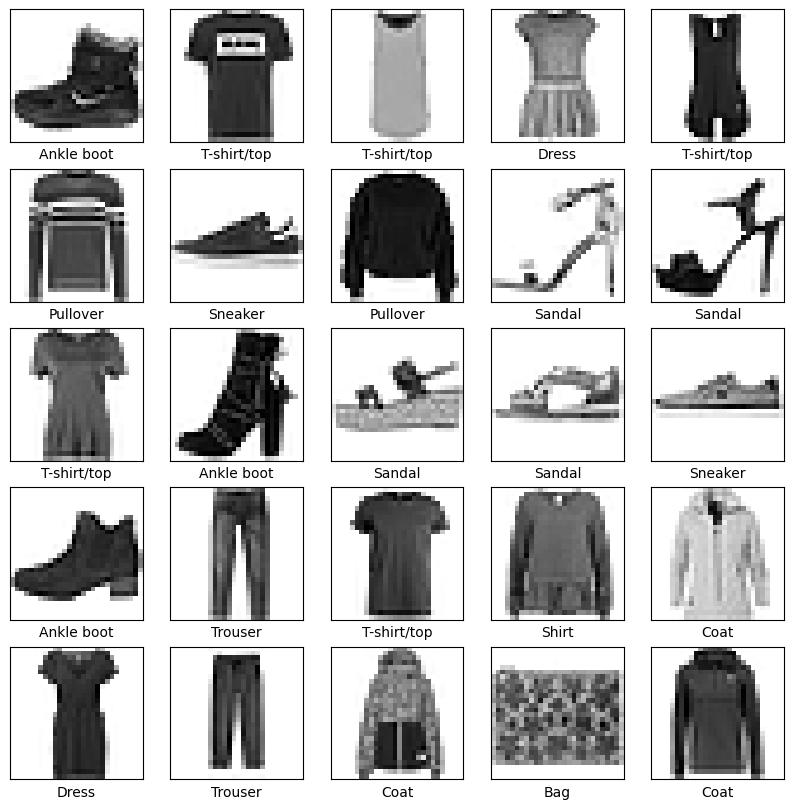

In [28]:
# vamos a mostrar más ejemplos del dataset:

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[y_train[i]])
plt.show()

# Ahora vamos a construir el modelo:

In [30]:
model = tf.keras.Sequential([
    # Primero convertimos las imagenes en array unimensional
    # (de 28*28px a 784px), esta capa solo reformatea los datos
    tf.keras.layers.Flatten(input_shape=(28,28)),
    # Después pasamos por dos capas Densas (fully connected)
    tf.keras.layers.Dense(128, activation='sigmoid'),
    # La ultima capa con la activación softmax devuelve
    # las probabilidades de las 10 clases y suman 1.
    tf.keras.layers.Dense(10, activation='softmax')
])

In [31]:
# compilamos el modelo
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [32]:
# Entranamos al modelo
model.fit(x_train, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 2s 940us/step - loss: 0.5373 - accuracy: 0.8159
Epoch 2/10
1875/1875 [==============================] - 2s 898us/step - loss: 0.3884 - accuracy: 0.8600
Epoch 3/10
1875/1875 [==============================] - 2s 885us/step - loss: 0.3537 - accuracy: 0.8727
Epoch 4/10
1875/1875 [==============================] - 2s 913us/step - loss: 0.3290 - accuracy: 0.8796
Epoch 5/10
1875/1875 [==============================] - 2s 878us/step - loss: 0.3113 - accuracy: 0.8868
Epoch 6/10
1875/1875 [==============================] - 2s 904us/step - loss: 0.2961 - accuracy: 0.8914
Epoch 7/10
1875/1875 [==============================] - 2s 985us/step - loss: 0.2840 - accuracy: 0.8956
Epoch 8/10
1875/1875 [==============================] - 2s 895us/step - loss: 0.2722 - accuracy: 0.9001
Epoch 9/10
1875/1875 [==============================] - 2s 880us/step - loss: 0.2621 - accuracy: 0.9028
Epoch 10/10
1875/1875 [==============================] - 2s 868u

In [33]:
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)

313/313 - 0s - loss: 0.3362 - accuracy: 0.8793 - 318ms/epoch - 1ms/step


In [41]:
# Hacemos predicciones y mostramos ejemplos:
predicctions = model.predict(x_test)


313/313 [==============================] - 0s 664us/step


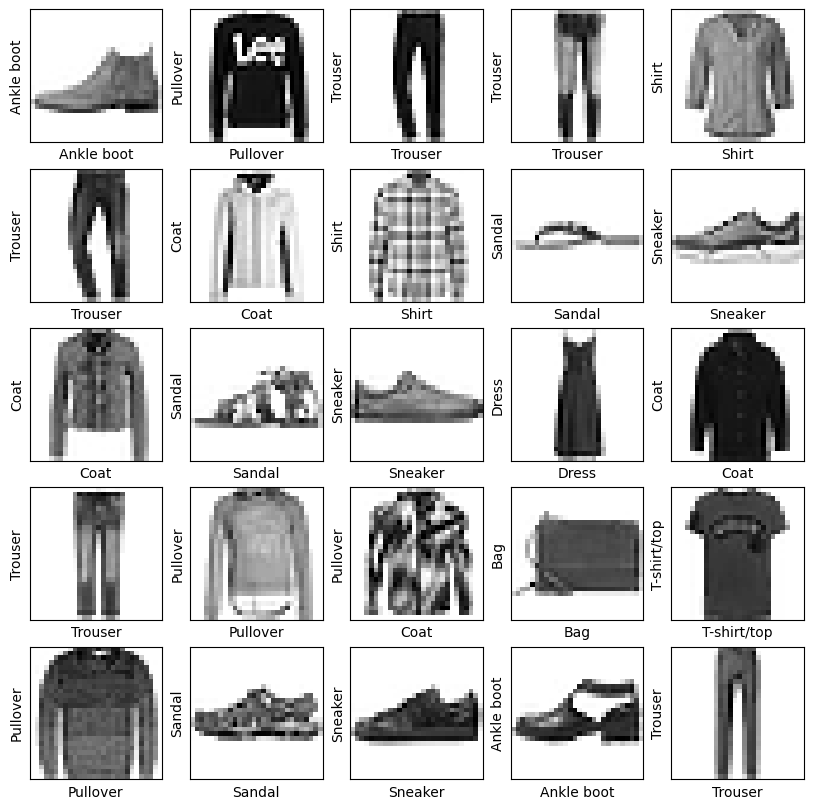

In [50]:
plt.figure(figsize=(10,10))

for i in range(25):
    plt.subplot(5,5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_test[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[y_test[i]])
    plt.ylabel(class_names[np.argmax(predicctions[i])])   
plt.show()